In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns


# plt.style.use('ggplot')
# sns.color_palette("hls", 8)
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.memory_usage', 'deep') 
# pd.set_option('compute.use_numba', False)
pd.set_option('mode.string_storage','pyarrow')
pd.set_option('plotting.backend', 'matplotlib') 
pd.set_option('mode.copy_on_write',False)

In [3]:
df = pd.read_parquet(r"/home/muthu/GitHub/DATA 📁/SCM/scm.parquet.gzip")
df['billable_zone'] = df['billable_zone'].astype('category')  # << it's category 

In [4]:
df.info(verbose=True,memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3942236 entries, 0 to 3942235
Data columns (total 23 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int64         
 1   order_created_date      datetime64[ns]
 2   marketplace             category      
 3   item_id                 int64         
 4   promised_ship_date      datetime64[ns]
 5   promised_delivery_date  datetime64[ns]
 6   sales                   float64       
 7   po_ship_type            category      
 8   vendor_name             category      
 9   naomi_vendor            bool          
 10  order_details_tracker   int64         
 11  tracker                 float64       
 12  billable_weight         float64       
 13  billable_zone           category      
 14  total_charged           float64       
 15  amount                  float64       
 16  description             object        
 17  code_type               category      
 18  ca

###### Description
- [ ] order_id
- [ ] order_created_date
- [ ] marketplace
- [ ] item_id
- [ ] promised_ship_date
- [ ] promised_delivery_date
- [ ] sales
- [ ] po_ship_type
- [ ] vendor_name
- [ ] naomi_vendor
- [ ] order_details_tracker
- [ ] tracker
- [ ] billable_weight
- [ ] billable_zone
- [ ] total_charged
- [ ] amount
- [ ] description
- [ ] code_type
- [ ] carrier
- [ ] pickedup_location
- [ ] pickup_time
- [ ] deliver_location
- [ ] delivery_time

In [5]:
### Univarite Analysis

print(f"number of orders: `{df['order_id'].nunique()}` ordered from {df['order_created_date'].min()} to {df['order_created_date'].max()}")
print(f"How many ways we sold:: {df['marketplace'].nunique()} <<{df['marketplace'].unique().tolist()}>>")
print(f"Number of unique items sold:: `{df['item_id'].nunique()}`")
print(f"how many ways that we ship products:: {df['po_ship_type'].nunique()}   <<{df['po_ship_type'].nunique()}>>")
print(f"From {df['vendor_name'].nunique()}, we tied up for business")
print(f"There are {df['billable_zone'].nunique()} zones which includes <<{df['billable_zone'].unique().tolist()}>>")
print(f"Number of trackers it sends {df['tracker'].nunique()}")
print(f"How they'll move in carrier {df['carrier'].nunique()}  <<{df['carrier'].unique().tolist()}>>")

print(f"Approx we delivered `{df['deliver_location'].nunique()}` locations")
print(f"number of pickedup locations `{df['deliver_location'].nunique()}`")

number of orders: `402517` ordered from 2023-07-01 00:01:06.210000 to 2024-07-07 19:45:43.070000
How many ways we sold:: 11 <<['Amazon', 'Walmart', 'Home Depot', 'Website', 'Overstock', 'Ebay', 'Wayfair', 'Snap Commerce', 'Internal', 'Promotion', 'Check']>>
Number of unique items sold:: `42729`
how many ways that we ship products:: 7   <<7>>
From 375, we tied up for business
There are 11 zones which includes <<[7.0, 8.0, 3.0, 5.0, 6.0, 2.0, 4.0, nan, 53.0, 51.0, 0.0, 52.0]>>
Number of trackers it sends 563227
How they'll move in carrier 5  <<['FedEx', 'UPS', 'FedEx Freight', 'Other', 'LTL']>>
Approx we delivered `19386` locations
number of pickedup locations `19386`


In [6]:
### Bi-variete

In [7]:
by_orderids = df.groupby('order_id')[['item_id','tracker','marketplace','sales','po_ship_type','order_created_date','delivery_time']].agg({
    'item_id': pd.Series.nunique,
    'tracker':pd.Series.nunique,
    'sales':lambda x:x.unique().sum(),                                       #df.groupby(['order_id','item_id'])['sales'].apply(lambda x:x.unique().sum())
    'po_ship_type':lambda x: x.mode() if not x.isna().all() else pd.NA,
    'marketplace':lambda x: x.mode() if not x.isna().all() else pd.NA,
    'order_created_date':'min',#pd.Series.mode, no_issues,bcz nunique=1
    'delivery_time':'max'
})

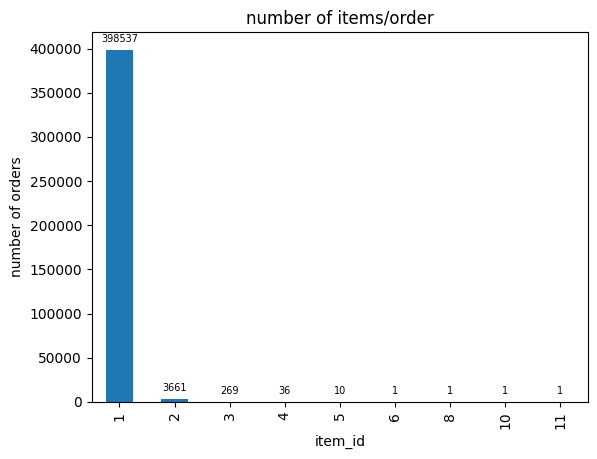

In [8]:
plot = by_orderids['item_id'].value_counts().sort_index().plot(kind='bar')
for bar in plot.patches: 
    plot.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=7, xytext=(0, 8), textcoords='offset points')
plt.ylabel('number of orders')
plt.title("number of items/order")
plt.show()

In [9]:
# Investication on ItemId
by_orderids[by_orderids['item_id']>5]
# ??

,item_id,tracker,sales,po_ship_type,marketplace,order_created_date,delivery_time
order_id,,,,,,,
6473475,6,2,549.89,FedEx Ground,Amazon,2023-07-01 13:31:10.957,2023-07-07 12:21:13
6889669,11,7,604.53,FedEx Home,Ebay,2024-03-03 23:30:22.810,2024-03-11 11:32:43
7003114,8,19,2519.32,FedEx Home,Website,2024-05-14 13:27:26.880,2024-06-11 16:01:24
7015374,10,15,1388.17,FedEx Home,Amazon,2024-05-22 16:45:12.893,2024-05-28 14:20:55


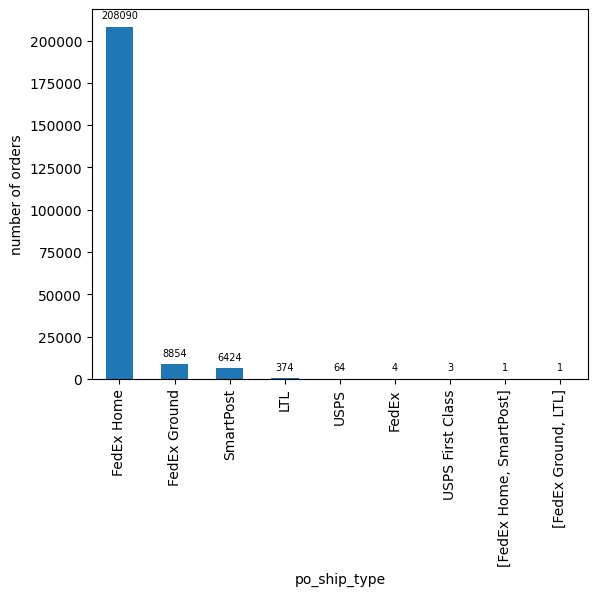

In [10]:
plot = by_orderids['po_ship_type'].value_counts().plot(kind='bar')
for bar in plot.patches: 
    plot.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=7, xytext=(0, 8), textcoords='offset points')
plt.ylabel('number of orders')
plt.show()

In [11]:
# Q
# what is po_ship_type
# each tracker has 2 po_ship_type?? `6495936`

_ = df.groupby(['order_id','item_id','tracker'])['po_ship_type'].nunique()#.max()
_[_>1].reset_index()

,order_id,item_id,tracker,po_ship_type
0,6495936,2121315,7.814409e+11,2
1,6495936,2121315,7.814409e+11,2
2,6495936,2121315,7.814409e+11,2
3,6495936,2121315,7.814409e+11,2
4,6495936,2121315,7.814409e+11,2
...,...,...,...,...
167,6495936,2121321,7.814410e+11,2
168,6495936,2121321,7.814410e+11,2
169,6495936,2121321,7.814410e+11,2
170,6495936,2121321,7.814410e+11,2


In [12]:
by_orderids.loc[by_orderids['po_ship_type'].str.len()==2]

,item_id,tracker,sales,po_ship_type,marketplace,order_created_date,delivery_time
order_id,,,,,,,
6485385,2,2,108.84,"['FedEx Home', 'SmartPost'] Categories (7, obj...",Website,2023-07-10 19:27:44.000,2023-07-14 15:01:02
6495936,4,43,4204.33,"['FedEx Ground', 'LTL'] Categories (7, object)...",Amazon,2023-07-17 09:46:09.410,2023-07-24 17:02:03


Q: 
- How come 1 order_id 1 item_id has 2 po_ship_type `2 vendor_name` in 6485385 (website)
- How come 1 order_id 1 item_id has 2 po_ship_type in 6495936 (Amazon)

In [13]:
df.loc[df['order_id']==6485385].groupby('item_id').get_group(2000300) #ngroups>2  #(562053)

# df.loc[df['order_id']==6495936]#.groupby('item_id').get_group(2121315)#groups#ngroups
# Order ID: 6495936
# number of Items: 4
# 1 vendor_name: 'Advantus'
# marketplace: Amazon
# each item_id 2 po_ship_type
df.loc[((df['order_id']==6495936))].groupby(['order_id','item_id'])[['po_ship_type','tracker','vendor_name']].agg({
    'tracker':pd.Series.nunique,
    'po_ship_type':lambda x: x.mode() if not x.isna().all() else pd.NA,
    'vendor_name':pd.Series.nunique
})    # & (df['item_id']==2121315)

tracker                                       po_ship_type  \
order_id item_id                                                               
6495936  2121315       43  ['FedEx Ground', 'LTL']
Categories (7, object)...   
         2121316       43  ['FedEx Ground', 'LTL']
Categories (7, object)...   
         2121317       43  ['FedEx Ground', 'LTL']
Categories (7, object)...   
         2121321       43  ['FedEx Ground', 'LTL']
Categories (7, object)...   

                  vendor_name  
order_id item_id               
6495936  2121315            1  
         2121316            1  
         2121317            1  
         2121321            1

In [14]:
# Q
# - [ ] how come 1032 item_id has more than 1 vendors

_ = df.groupby(['order_id','item_id'])['vendor_name'].nunique()#.max() #.sample(100)
_[_>1].reset_index().drop_duplicates()

,order_id,item_id,vendor_name
0,6474637,555626,3
1,6474637,1268778,3
2,6474637,2302714,3
3,6477350,2088733,2
4,6477350,2329572,2
...,...,...,...
1027,7068665,2326059,2
1028,7069938,2326429,2
1029,7070820,2326429,2
1030,7071015,2089445,2


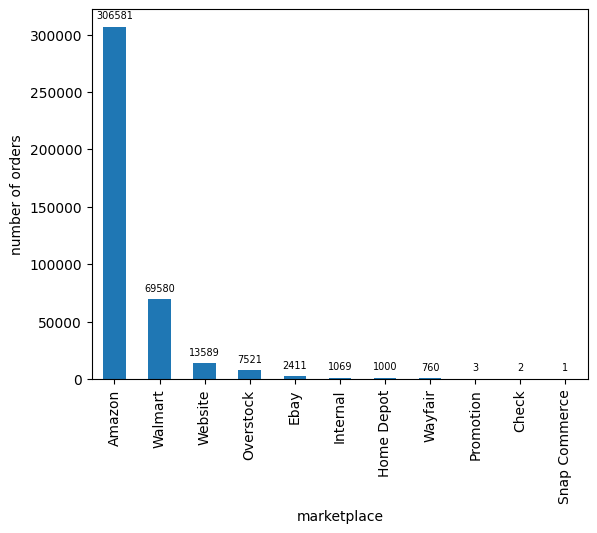

In [15]:
plot = by_orderids['marketplace'].value_counts().plot(kind='bar')
for bar in plot.patches: 
    plot.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=7, xytext=(0, 8), textcoords='offset points')
plt.ylabel('number of orders')
plt.show()

number of orders in Promo: 3
ordered date:: 2023-08-16
number of items in order: 3 and itemids::[2299882, 2299885, 2299872] respective sales in $[123.72, 156.3, 151.8]
promised date:: [NaT]
is ordered from naomi:: [True]
delivered to:: order_id
6534130    [SAN ANTONIO TX]
6534131    [SAN ANTONIO TX]
6534132          [MONEE IL]
vendors for the each item ids: 
order_id  item_id
6534130   2299882    [World Depot]
6534131   2299885    [World Depot]
6534132   2299872    [World Depot]
Name: vendor_name, dtype: object


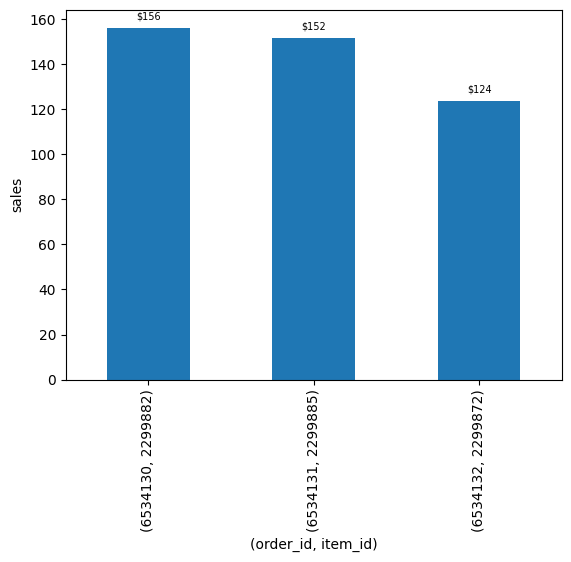

,tracker,order_created_date,promised_ship_date,promised_delivery_date,pickup_time,delivery_time,delayed_time
0,7.828472e+11,2023-08-16 04:55:08.923,2023-08-18,NaT,2023-08-23 17:53:00,2023-08-28 12:00:00,12 days 07:04:51.077000
1,7.828472e+11,2023-08-16 04:55:08.923,2023-08-18,NaT,2023-08-23 17:53:00,2023-08-28 12:00:00,12 days 07:04:51.077000
2,7.828471e+11,2023-08-16 04:55:08.923,2023-08-18,NaT,2023-08-23 17:53:00,2023-08-28 12:00:00,12 days 07:04:51.077000
3,7.828472e+11,2023-08-16 04:55:08.923,2023-08-18,NaT,2023-08-23 17:53:00,2023-08-28 12:00:00,12 days 07:04:51.077000
4,7.828471e+11,2023-08-16 04:55:08.923,2023-08-18,NaT,2023-08-23 17:53:00,2023-08-28 12:00:00,12 days 07:04:51.077000
5,7.828471e+11,2023-08-16 04:58:54.917,2023-08-18,NaT,2023-08-23 17:53:00,2023-08-28 12:00:00,12 days 07:01:05.083000
6,7.828471e+11,2023-08-16 04:58:54.917,2023-08-18,NaT,2023-08-23 17:53:00,2023-08-28 12:00:00,12 days 07:01:05.083000
7,7.828471e+11,2023-08-16 04:58:54.917,2023-08-18,NaT,2023-08-23 17:53:00,2023-08-28 12:00:00,12 days 07:01:05.083000
8,7.828471e+11,2023-08-16 04:58:54.917,2023-08-18,NaT,2023-08-23 17:53:00,2023-08-28 12:00:00,12 days 07:01:05.083000
9,7.828471e+11,2023-08-16 04:58:54.917,2023-08-18,NaT,2023-08-23 17:53:00,2023-08-28 12:00:00,12 days 07:01:05.083000


In [16]:
ord_by_promo = df.loc[df['marketplace']=='Promotion']

print(f"number of orders in Promo: {ord_by_promo['order_id'].nunique()}")
print(f"ordered date:: {ord_by_promo['order_created_date'].dt.date.values[0].__str__()}")
print(f"number of items in order: {ord_by_promo.item_id.nunique()} and itemids::{ord_by_promo.item_id.unique().tolist()} respective sales in ${ord_by_promo.groupby('item_id')['sales'].max().tolist()}")
print(f"promised date:: {ord_by_promo['promised_delivery_date'].unique().tolist()}")
print(f"is ordered from naomi:: {ord_by_promo['naomi_vendor'].unique().tolist()}")
print(f"delivered to:: {ord_by_promo.groupby('order_id')['deliver_location'].unique().to_string()}")

print(f"vendors for the each item ids: \n{ord_by_promo.groupby(['order_id','item_id'])['vendor_name'].apply(lambda x:pd.Series(x).unique().tolist())}")

plot =ord_by_promo.groupby(['order_id','item_id'])['sales'].apply(lambda x:x.unique().sum()).plot(kind='bar',x='item_id',y='sales',xlabel='(order_id, item_id)')
for bar in plot.patches: 
    plot.annotate(f"${bar.get_height():.0f}",(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=7, xytext=(0, 8), textcoords='offset points')
plt.ylabel('sales')
plt.show()


ord_by_promo[['tracker','order_created_date','promised_ship_date','promised_delivery_date','pickup_time','delivery_time']].assign(
    delayed_time = (ord_by_promo['delivery_time']-ord_by_promo['order_created_date'])
).drop_duplicates(subset=['tracker','delivery_time']).sort_values(by='delivery_time').reset_index(drop=True)

number of orders in Check: 2
ordered date:: 2023-09-08
number of items in order: 3 and itemids::[558686, 1984360, 2380499] respective sales in $[0.0, 0.0, 0.0]
promised date:: [NaT]
is ordered from naomi:: [False]
delivered to:: order_id
6561288    [BOYNTON BEACH FL]
7053340      [MIAMI BEACH FL]
vendors for the each item ids: 
order_id  item_id
6561288   558686           [Pacific Cycle]
7053340   1984360    [East West Furniture]
          2380499    [East West Furniture]
Name: vendor_name, dtype: object


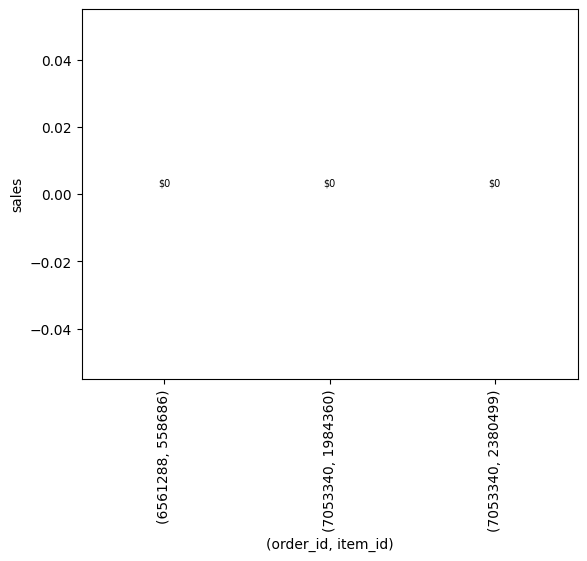

,tracker,order_created_date,promised_ship_date,promised_delivery_date,pickup_time,delivery_time,delayed_time
0,7.835309e+11,2023-09-08 13:02:09.723,2023-09-12,NaT,2023-09-11 00:00:00,2023-09-16 10:16:56,7 days 21:14:46.277000
1,7.493716e+11,2024-06-17 03:55:58.253,2024-06-19,NaT,2024-06-18 16:32:00,2024-06-21 12:23:04,4 days 08:27:05.747000
2,7.493716e+11,2024-06-17 03:55:58.253,2024-06-19,NaT,2024-06-18 16:32:00,2024-06-21 12:23:04,4 days 08:27:05.747000
3,7.493716e+11,2024-06-17 03:55:58.253,2024-06-19,NaT,2024-06-18 16:32:00,2024-06-21 12:26:52,4 days 08:30:53.747000
4,7.493716e+11,2024-06-17 03:55:58.253,2024-06-19,NaT,2024-06-18 16:32:00,2024-06-21 12:26:52,4 days 08:30:53.747000


In [17]:
ord_by_check = df.loc[df['marketplace']=='Check']

print(f"number of orders in Check: {ord_by_check['order_id'].nunique()}")
print(f"ordered date:: {ord_by_check['order_created_date'].dt.date.values[0].__str__()}")
print(f"number of items in order: {ord_by_check.item_id.nunique()} and itemids::{ord_by_check.item_id.unique().tolist()} respective sales in ${ord_by_check.groupby('item_id')['sales'].max().tolist()}")
print(f"promised date:: {ord_by_check['promised_delivery_date'].unique().tolist()}")
print(f"is ordered from naomi:: {ord_by_check['naomi_vendor'].unique().tolist()}")
print(f"delivered to:: {ord_by_check.groupby('order_id')['deliver_location'].unique().to_string()}")

print(f"vendors for the each item ids: \n{ord_by_check.groupby(['order_id','item_id'])['vendor_name'].apply(lambda x:pd.Series(x).unique().tolist())}")

plot =ord_by_check.groupby(['order_id','item_id'])['sales'].apply(lambda x:x.unique().sum()).plot(kind='bar',x='item_id',y='sales',xlabel='(order_id, item_id)')
for bar in plot.patches: 
    plot.annotate(f"${bar.get_height():.0f}",(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=7, xytext=(0, 8), textcoords='offset points')
plt.ylabel('sales')
plt.show()


ord_by_check[['tracker','order_created_date','promised_ship_date','promised_delivery_date','pickup_time','delivery_time']].assign(
    delayed_time = (ord_by_check['delivery_time']-ord_by_check['order_created_date'])
).drop_duplicates(subset=['tracker','delivery_time']).sort_values(by='delivery_time').reset_index(drop=True)

number of orders in snapcommerce: 1
ordered date:: 2023-07-02
number of items in order: 3 and itemids::[555626, 1268778, 2302714] respective sales in $[495.58, 295.28, 168.55]
promised date:: [NaT]
is ordered from naomi:: [False]
delivered to::
['BOYNTON BEACH FL']
vendors for the each item ids: 
item_id
555626     [Coaster, Kings Pond, Mesa Safe]
1268778    [Coaster, Kings Pond, Mesa Safe]
2302714    [Coaster, Kings Pond, Mesa Safe]
Name: vendor_name, dtype: object


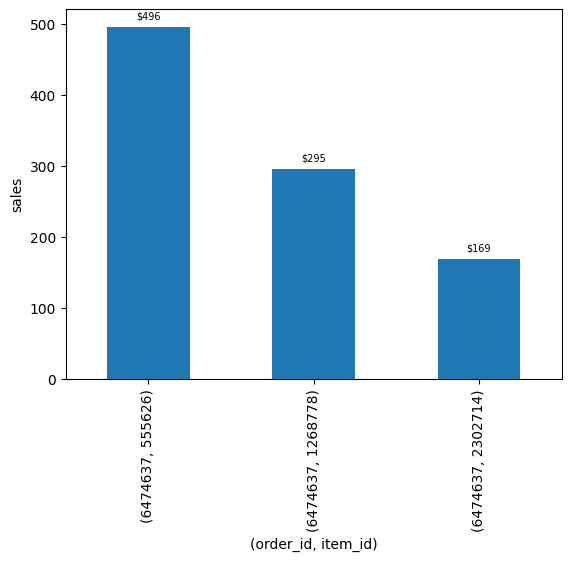

,tracker,order_created_date,promised_ship_date,promised_delivery_date,pickup_time,delivery_time,delayed_time
0,7.807118e+11,2023-07-02 12:04:36.313,2023-07-10,NaT,2023-07-05 00:00:00,2023-07-06 10:05:59,3
1,6.470443e+11,2023-07-02 12:04:36.313,2023-07-10,NaT,2023-07-03 15:53:00,2023-07-07 10:30:01,4
2,7.806513e+11,2023-07-02 12:04:36.313,2023-07-10,NaT,2023-07-03 17:56:00,2023-07-10 10:24:14,7
3,7.806513e+11,2023-07-02 12:04:36.313,2023-07-10,NaT,2023-07-03 17:56:00,2023-07-10 10:24:14,7


In [18]:
df_snap_commerce = df.loc[df['marketplace']=='Snap Commerce']

print(f"number of orders in snapcommerce: {df_snap_commerce['order_id'].nunique()}")
print(f"ordered date:: {df_snap_commerce['order_created_date'].dt.date.values[0].__str__()}")
print(f"number of items in order: {df_snap_commerce.item_id.nunique()} and itemids::{df_snap_commerce.item_id.unique().tolist()} respective sales in ${df_snap_commerce.groupby('item_id')['sales'].max().tolist()}")
print(f"promised date:: {df_snap_commerce['promised_delivery_date'].unique().tolist()}")
print(f"is ordered from naomi:: {df_snap_commerce['naomi_vendor'].unique().tolist()}")
print(f"delivered to::\n{df_snap_commerce['deliver_location'].unique().tolist()}")

print(f"vendors for the each item ids: \n{df_snap_commerce.groupby('item_id')['vendor_name'].apply(lambda x:pd.Series(x).unique().tolist())}")

plot =df_snap_commerce.groupby(['order_id','item_id'])['sales'].apply(lambda x:x.unique().sum()).plot(kind='bar',x='item_id',y='sales',xlabel='(order_id, item_id)')
for bar in plot.patches: 
    plot.annotate(f"${bar.get_height():.0f}",(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=7, xytext=(0, 8), textcoords='offset points')
plt.ylabel('sales')
plt.show()


df_snap_commerce[['tracker','order_created_date','promised_ship_date','promised_delivery_date','pickup_time','delivery_time']].assign(
    delayed_time = (df_snap_commerce['delivery_time']-df_snap_commerce['order_created_date']).dt.days
).drop_duplicates(subset=['tracker','delivery_time']).sort_values(by='delivery_time').reset_index(drop=True)

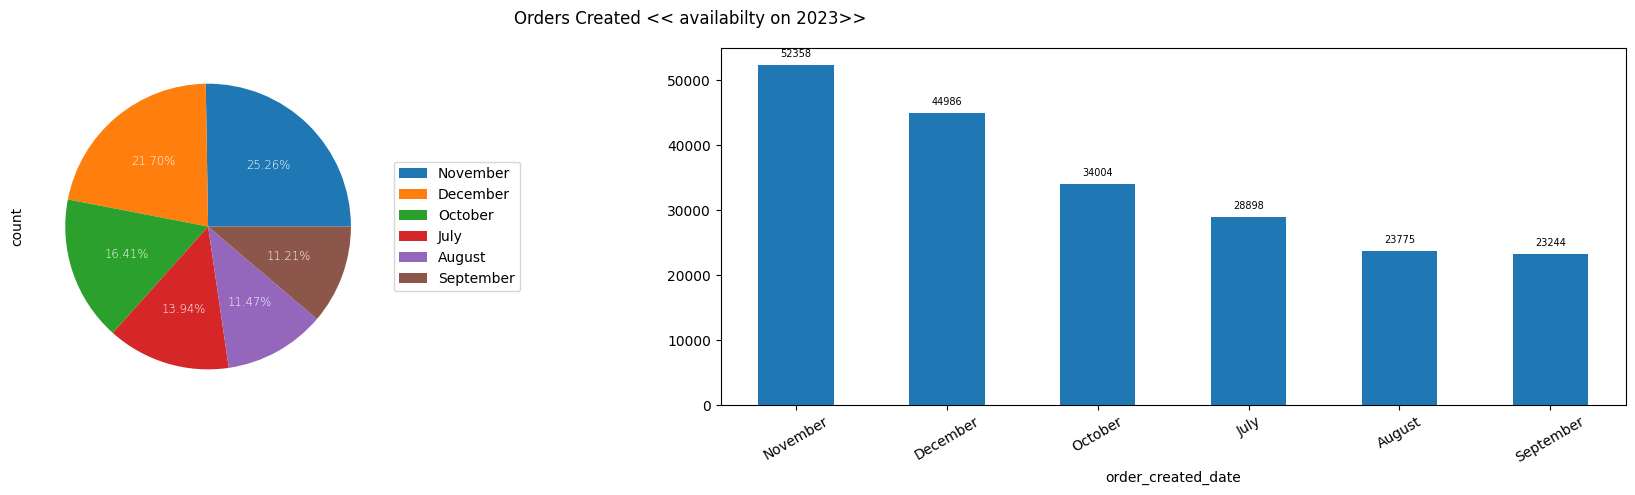

In [19]:
fig,[ax1,ax2] = plt.subplots(nrows=1,ncols=2,figsize=(19,5),tight_layout=True)
by_orderids.loc[by_orderids['order_created_date'].dt.year==2023,'order_created_date'].dt.month_name().value_counts().plot(kind='pie',autopct="%.2f%%", textprops = { "size":"small", "fontweight":"5", 'color':'w'},ax=ax1)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

by_orderids.loc[by_orderids['order_created_date'].dt.year==2023,'order_created_date'].dt.month_name().value_counts().plot(kind='bar',ax=ax2)
ax2.set_xticklabels(labels=by_orderids.loc[by_orderids['order_created_date'].dt.year==2023,'order_created_date'].dt.month_name().value_counts().index, rotation=30)
for bar in ax2.patches:
        ax2.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=7, xytext=(0, 8), textcoords='offset points')

fig.suptitle("Orders Created << availabilty on 2023>>")
plt.show()

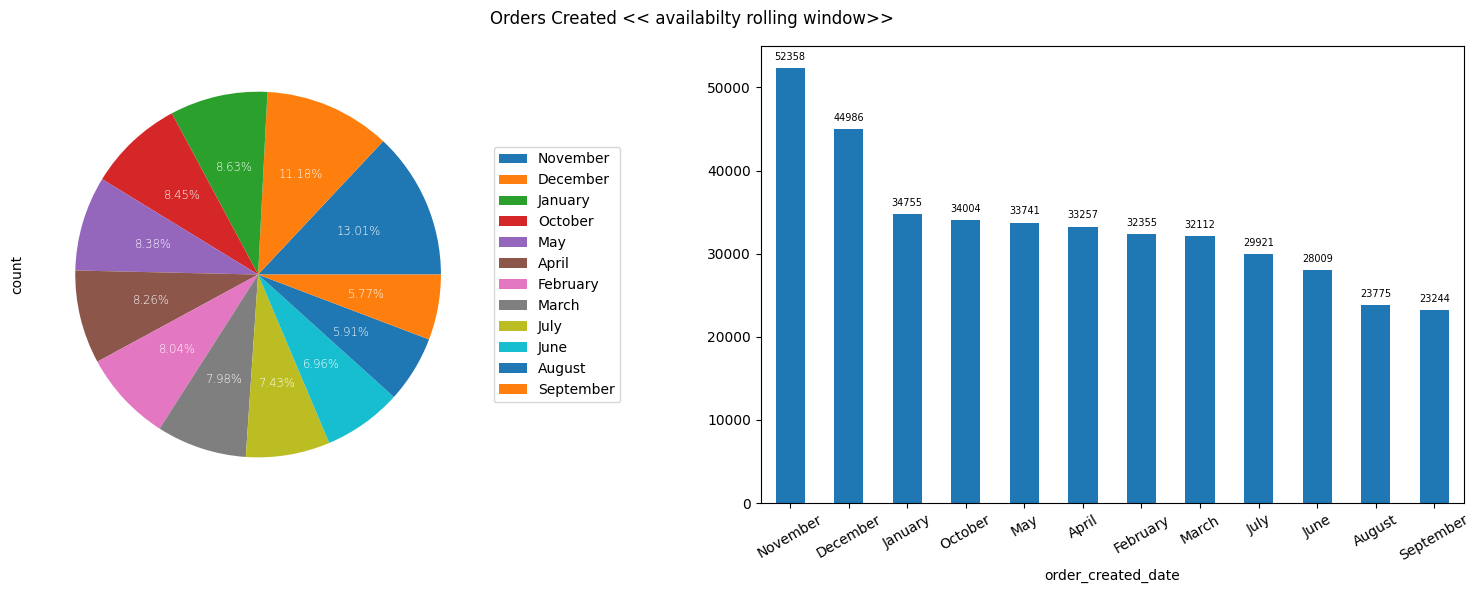

In [20]:
fig,[ax1,ax2] = plt.subplots(nrows=1,ncols=2,figsize=(16,6),tight_layout=True)
by_orderids['order_created_date'].dt.month_name().value_counts().plot(kind='pie',autopct="%.2f%%", textprops = { "size":"small", "fontweight":"5", 'color':'w'},ax=ax1)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

by_orderids['order_created_date'].dt.month_name().value_counts().plot(kind='bar',ax=ax2)
ax2.set_xticklabels(labels=by_orderids['order_created_date'].dt.month_name().value_counts().index, rotation=30)
for bar in ax2.patches:
        ax2.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=7, xytext=(0, 8), textcoords='offset points')
fig.suptitle("Orders Created << availabilty rolling window>>")
plt.show()

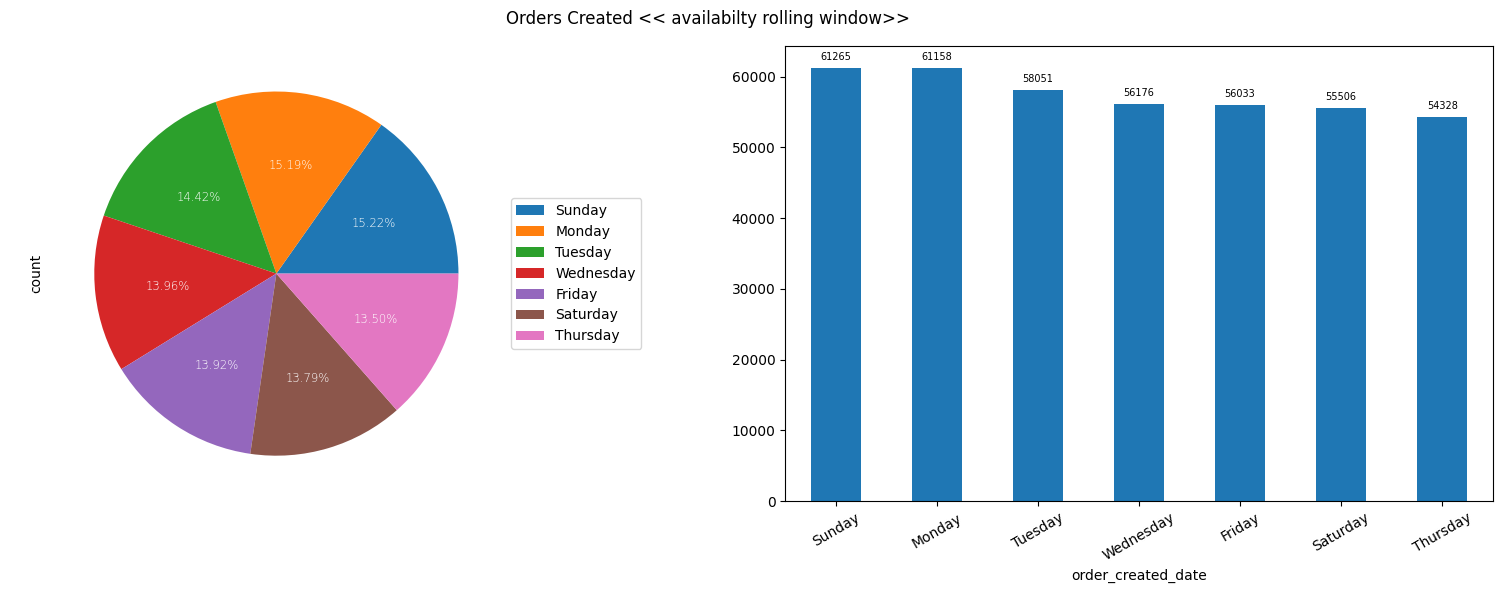

In [21]:
fig,[ax1,ax2] = plt.subplots(nrows=1,ncols=2,figsize=(16,6),tight_layout=True)
by_orderids['order_created_date'].dt.day_name().value_counts().plot(kind='pie',autopct="%.2f%%", textprops = { "size":"small", "fontweight":"5", 'color':'w'},ax=ax1)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

by_orderids['order_created_date'].dt.day_name().value_counts().plot(kind='bar',ax=ax2)
ax2.set_xticklabels(labels=by_orderids['order_created_date'].dt.day_name().value_counts().index, rotation=30)
for bar in ax2.patches:
        ax2.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=7, xytext=(0, 8), textcoords='offset points')
fig.suptitle("Orders Created << availabilty rolling window>>")
plt.show()

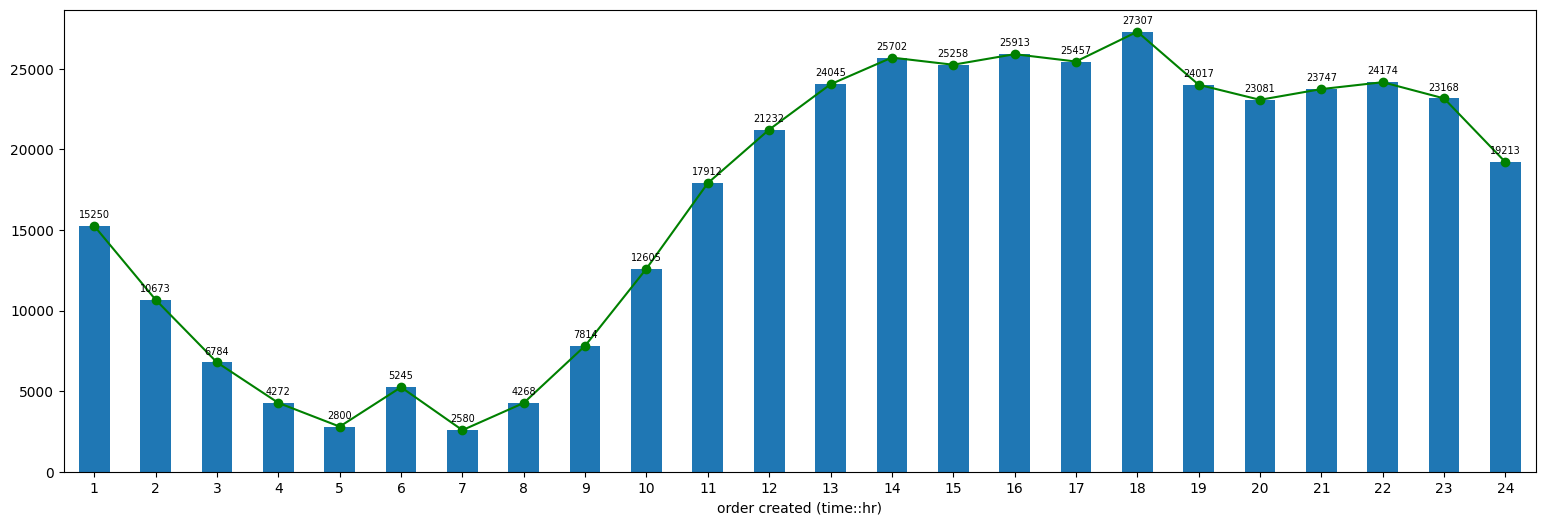

In [22]:
plt.figure(figsize=(19,6))
plot = by_orderids['order_created_date'].dt.hour.value_counts().sort_index().plot(kind='bar')
for bar in plot.patches:
        plt.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=7, xytext=(0, 8), textcoords='offset points')
plt.xticks(ticks=range(24), labels=range(1, 25))
by_orderids['order_created_date'].dt.hour.value_counts().sort_index().plot(kind='line',marker='o',color='green')
plt.xlabel("order created (time::hr)")
plt.show()

In [23]:
df.groupby('order_id')['delivery_time'].nunique().max()  # How possible this?

11

In [24]:
df.groupby(['order_id','item_id'])['delivery_time'].nunique().max()  # How possible

11

In [25]:
_ = df.groupby(['order_id','item_id','tracker'])['delivery_time'].nunique()   # How possible
_[_==2]

order_id  item_id  tracker     
6482969   2320257  6.129098e+19    2
6527041   735333   6.129270e+19    2
6585723   2298878  7.736685e+11    2
7058955   2019593  6.129098e+19    2
Name: delivery_time, dtype: int64

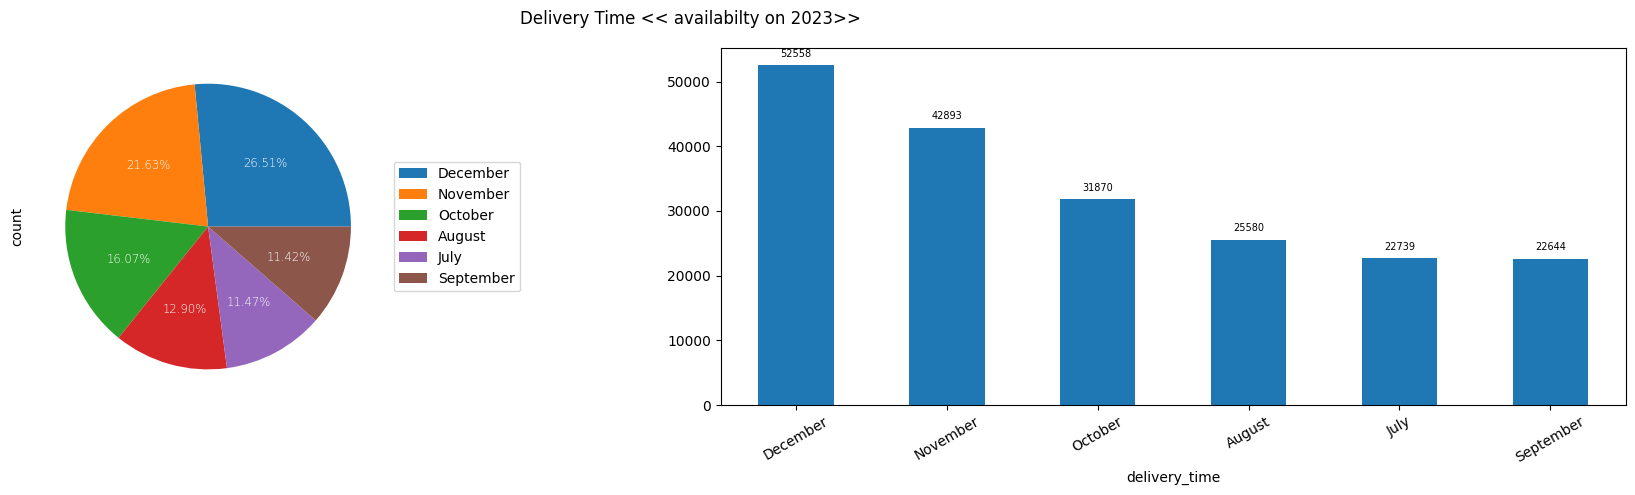

In [26]:
fig,[ax1,ax2] = plt.subplots(nrows=1,ncols=2,figsize=(19,5),tight_layout=True)
by_orderids.loc[by_orderids['delivery_time'].dt.year==2023,'delivery_time'].dt.month_name().value_counts().plot(kind='pie',autopct="%.2f%%", textprops = { "size":"small", "fontweight":"5", 'color':'w'},ax=ax1)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

by_orderids.loc[by_orderids['delivery_time'].dt.year==2023,'delivery_time'].dt.month_name().value_counts().plot(kind='bar',ax=ax2)
ax2.set_xticklabels(labels=by_orderids.loc[by_orderids['delivery_time'].dt.year==2023,'delivery_time'].dt.month_name().value_counts().index, rotation=30)
for bar in ax2.patches:
        ax2.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=7, xytext=(0, 8), textcoords='offset points')

fig.suptitle("Delivery Time << availabilty on 2023>>")
plt.show()

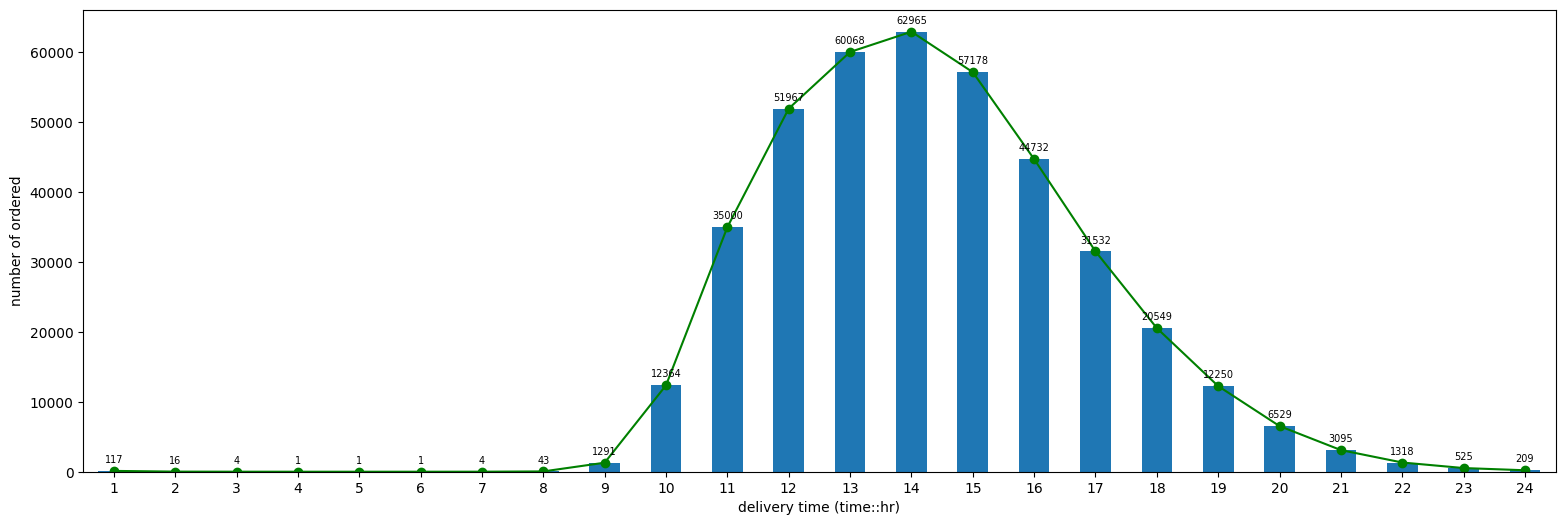

In [27]:
plt.figure(figsize=(19,6))
plot = by_orderids['delivery_time'].dt.hour.value_counts().sort_index().plot(kind='bar')
for bar in plot.patches:
        plt.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=7, xytext=(0, 8), textcoords='offset points')
plt.xticks(ticks=range(24), labels=range(1, 25))
by_orderids['delivery_time'].dt.hour.value_counts().sort_index().plot(kind='line',marker='o',color='green')
plt.xlabel("delivery time (time::hr)")
plt.ylabel("number of ordered")
plt.show()

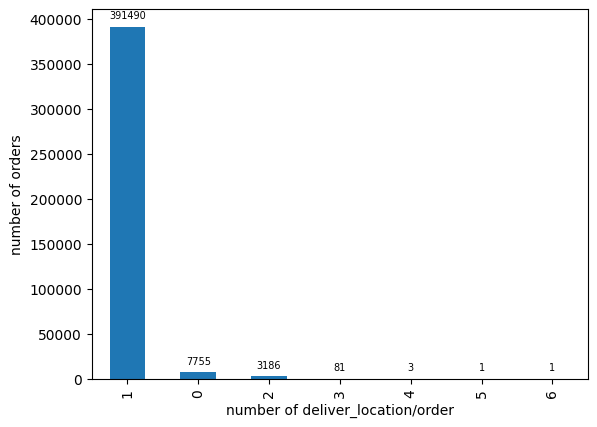

In [28]:
_ = df.groupby('order_id')['deliver_location'].nunique()
# df.loc[df['order_id'].isin(_[_>1].index),'marketplace'].value_counts()    ?? How it's Possible
plot = _.value_counts().plot(kind='bar')
for bar in plot.patches:
        plt.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=7, xytext=(0, 8), textcoords='offset points')
plt.xlabel('number of deliver_location/order')
plt.ylabel('number of orders')
plt.show()

In [29]:
disect_deliver_location = df.groupby(['order_id','item_id','tracker'])['deliver_location'].agg(pd.Series.mode).reset_index()

In [30]:
from tqdm import tqdm 

100%|██████████| 581205/581205 [00:00<00:00, 3371794.99it/s]


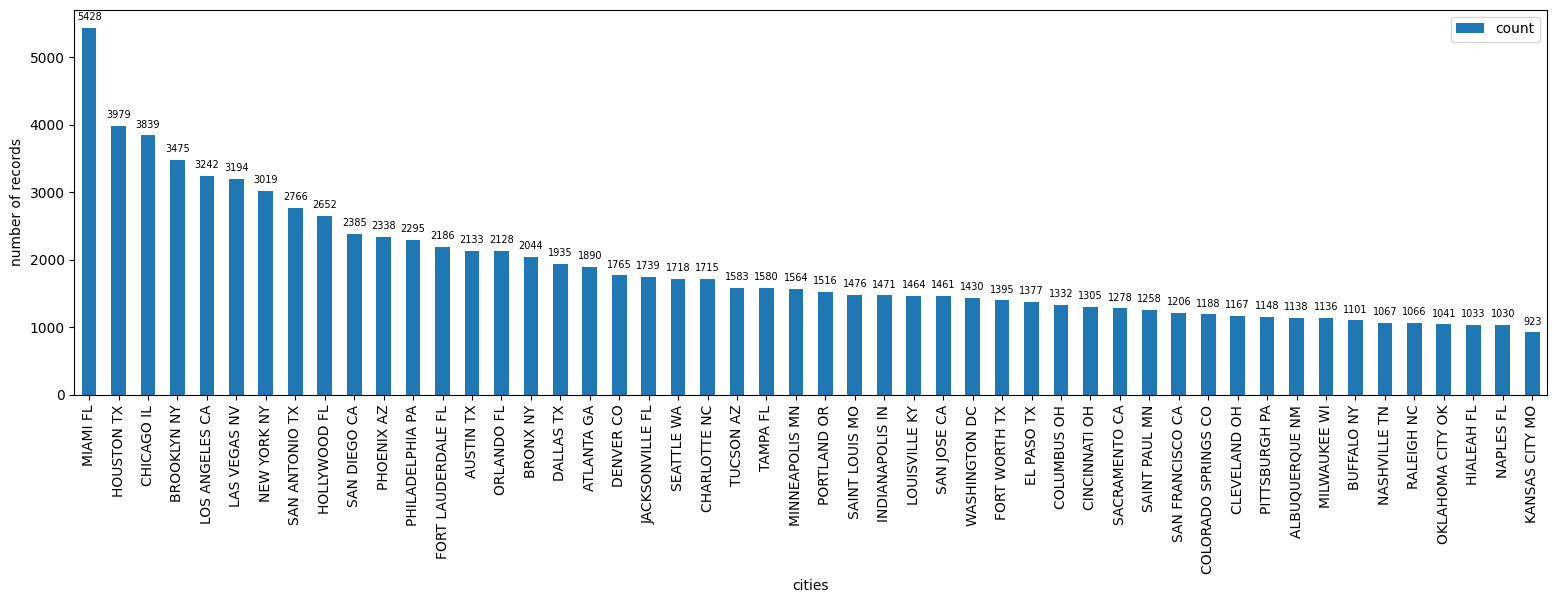

In [31]:
d = {}
for _loc in tqdm(disect_deliver_location['deliver_location'].values.tolist()):
    if (len(_loc)==0): 
        pass
    else:
        if _loc in d:
            d[_loc] +=1
        else:
            d[_loc] = 1

locations = pd.DataFrame([d]).T.reset_index().rename(columns={0:'count'})

# plt.figure(figsize=(24,10))
plot = locations.sort_values(by='count',ascending=False)[:50].plot(kind='bar',x='index',y='count',figsize=(19,5))
for bar in plot.patches:
        plt.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=7, xytext=(0, 8), textcoords='offset points')
plt.xlabel('cities')
plt.ylabel('number of records') #<<orders,items,trackers>>
plt.show()